Please fill out the information of your group!

| <p style="text-align: center;">First Name</p>  | <p style="text-align: center;">Family Name</p> | Matr.-No. |
| ---------------------------------------------- | ---------------------------------------------- | -------- |
| <p style="text-align: left">*EDIT!*</p>| <p style="text-align: left">*EDIT!*</p> | *EDIT!* |
| <p style="text-align: left">Michael</p>| <p style="text-align: left">Weikl</p> | k01154652 |


<h2 style="text-align: center">344.075 KV: Natural Language Processing (WS2021/22)</h2>
<h1 style="color:rgb(0,120,170)">Assignment 1</h1>
<h2 style="color:rgb(0,120,170)">Document Classification with Standard Machine Learning Methods</h2>

<div>
<b>Terms of Use</b><br>
This  material is prepared for educational purposes at the Johannes Kepler University (JKU) Linz, and is exclusively provided to the registered students of the mentioned course at JKU. It is strictly forbidden to distribute the current file, the contents of the assignment, and its solution. The use or reproduction of this manuscript is only allowed for educational purposes in non-profit organizations, while in this case, the explicit prior acceptance of the author(s) is required.

**Author:** Navid Rekab-Saz<br>
**Email:** navid.rekabsaz@jku.at<br>

</div>

<h2>Table of contents</h2>
<ol>
    <a href="#section-general-guidelines"><li style="font-size:large;font-weight:bold">General Guidelines</li></a>
    <a href="#section-preprocessing"><li style="font-size:large;font-weight:bold">Task A: Pre-processing & Feature Extraction (15 points)</li></a>
    <a href="#section-training"><li style="font-size:large;font-weight:bold">Task B: Training and Results Analysis (15 points)</li></a>
    <a href="#section-optional"><li style="font-size:large;font-weight:bold">Task C: Linear Model Interpretability (2 extra point)</li></a>
    
</ol>

<a name="section-general-guidelines"></a><h2 style="color:rgb(0,120,170)">General Guidelines</h2>

<div>

### Assignment objective

The aim of this assignment is to implement a document (sentence) classification model using (standard) machine learning methods. The assignment in total has **30 points**; it also offers **2 extra points** which can cover any missing point.

This Notebook encompasses all aspects of the assignment, namely the descriptions of tasks as well as your solutions and reports. Feel free to add any required cell for solutions. The cells can contain code, reports, charts, tables, or any other material, required for the assignment. Feel free to provide the solutions in an interactive and visual way! 

Please discuss any unclear point in the assignment in the provided forum in MOODLE. It is also encouraged to provide answers to your peer's questions. However when submitting a post, keep in mind to avoid providing solutions. Please let the tutor(s) know shall you find any error or unclarity in the assignment.

### Implementation & Libraries

The assignment should be implemented with recent versions of `Python` (>3.7). Any standard Python library can be used, so far that the library is free and can be simply installed using `pip` or `conda`. Examples of potentially useful libraries are `scikit-learn`, `numpy`, `scipy`, `gensim`, `nltk`, `spaCy`, and `AllenNLP`. Use the latest stable version of each library.

### Submission

Each group submits one Notebook file (`.ipynb`) trough MOODLE. Do not forget to put in your names and student numbers in the first cell of the Notebook. **In the submitted Notebook, all the results and visualizations should already be present, and can be observed simply by loading the Notebook in a browser.** The Notebook must be self-contained, meaning that one can run all the cells from top to bottom without any error. If you need to include extra files in the submission, compress all files (together with the Notebook) in a `zip` file and submit the zip file to MOODLE. You do not need to include the data files in the submission.

Cover the questions/points, mentioned in the tasks, but also add any necessary point for understanding your experiments.  


### Dataset

To conduct the experiments, two datasets are provided. The datasets are taken from the data of `thedeep` project, produced by the DEEP (https://www.thedeep.io) platform. The DEEP is an open-source platform, which aims to facilitate processing of textual data for international humanitarian response organizations. The platform enables the classification of text excerpts, extracted from news and reports into a set of domain specific classes. The provided dataset has 12 classes (labels) like agriculture, health, and protection. 

The difference between the datasets is in their sizes. We refer to these as `medium` and `small`, containing an overall number of 38,000 and 12,000 annotated text excerpts, respectively. Select one of the datasets, and use it for all of the tasks. `medium` provides more data and therefore reflects a more realistic scenario. `small` is however provided for the sake of convenience, particularly if running the experiments on your available hardware takes too long. Using `medium` is generally recommended, but from the point of view of assignment grading, there is no difference between the datasets.

Download the dataset from [this link](https://drive.jku.at/filr/public-link/file-download/0cce88f07c9c862b017c9cfba294077a/33590/5792942781153185740/nlp2021_22_data.zip).

Whether `medium` or `small`, you will find the following files in the provided zip file:
- `thedeep.$name$.train.txt`: Train set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.validation.txt`: Validation set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.test.txt`: Test set in csv format with three fields: sentence_id, text, and label.
- `thedeep.$name$.label.txt`: Captions of the labels.
- `README.txt`: Terms of use of the dataset.

</div>


<a name="section-preprocessing"></a><h2 style="color:rgb(0,120,170)">Task A: Pre-processing & Feature Extraction (15 points)</h2>

<div>
    
**Preprocessing (4 points).** Load the train, validation, and test sets. Study the text and according to your judgements, apply at least <ins>two text cleaning/preprocessing methods</ins>. Punctuations marks, numbers, dates, case-sensitivity are some examples of the elements which can be potentially considered for cleaning/preprocessing. Tokenize the result text with a tokenizer of your choice. Report your approaches to text cleaning and tokenization and the reasons of your choices. Provide some examples, showing the effects of the applied approaches on the text.

**Creating dictionary (4 points).** Create a dictionary of vocabularies following the guidelines discussed in the lecture. Next, reduce the size of dictionary using a method of your choice, for instance by considering a cut-off threshold on the tokens with low frequencies. When removing tokens from the dictionary, consider a strategy for handling Out-Of-Vocabulary (OOV) tokens, namely the ones in the train/validation/test datasets that that are not anymore in the dictionary. Some possible strategies could be to remove OOVs completely from the texts, or to replace them with a special token like <OOV\>. Explain your approaches and report the statistics of the dictionary before and after the reduction.

**Creating sentence vectors (4 points).** Use the dictionary to prepare <ins>two variations of document representation vectors</ins>, separately for train, validation, and test sets. Both variations follow a Bag-of-Words approach with a different token weighting method. The applied weightings can be any of the methods discussed in the lecture (namely `tc`, `tf`, and `tf-idf`), or other possible methods of your choice. Report the applied approaches. Calculate and report the sparsity rate of the vectors of train, validation, and test sets, namely what percentages of the vectors in each set are filled with zeros.

**Dimensionality reduction (3 points).** Reduce vectors' dimensions to $k$ by applying Latent Semantic Analysis (LSA) to the vectors of both variations. $k$ is a hyper-parameter and can be $10<k<1000$. Keep in mind the training and inference phases of LSA, when applied to the train, validation, and test sets. 

At the end of Task A, you should have the <ins>four feature vectors variations</ins> shown below, each consisting of the sets of train, validation, and test:
- **`Token Weighting I - High Dimensional`**
- **`Token Weighting I - Low Dimensional`**
- **`Token Weighting II - High Dimensional`**
- **`Token Weighting II - Low Dimensional`**


</div>

In [1]:
%matplotlib inline
from lib import import_datasets, get_n_most_common_tokens, \
preprocess_txt, get_best_lsa_reduced_feature_set, \
clean_text_corpus, compute_sparsity, get_vocab_tokens_from_df, \
latent_semantic_analysis, create_corpus_dict, plot_token_dict, \
vectorize_dataframe, calc_baseline_confusion, get_dummy_baseline, \
get_best_model_featureset, get_model_statistics, plot_features
import nltk
from nltk.tokenize import word_tokenize
import dill
from pprint import pprint
from collections import Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from nltk.probability import FreqDist
from numpy.linalg import svd
from typing import Tuple
from matplotlib import pyplot as plt
from pprint import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#nltk.download()

## Preprocessing

In [2]:
DATASET_SIZE = "small" # "medium"
# if already preprocessed then set to false to save time
PREPROC = False
# if already removed out of vocabulary words then set to false to save time
REDUCE_WORDS = False
# if already vectorized text corpus then set to false to save time
VECTORIZE = False
# if already performed LSA on document-term matrix then set to false to save time
DIM_REDUCT = False
# if already did model comparison then set to false to save time
COMPARE_MODELS = False

# config for plots
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
train_df, test_df, val_df = import_datasets(DATASET_SIZE)

<ipython-input-4-7fe62f07415d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0] for item in reversed(most_comm_tok)], rotation=30, ha="right")


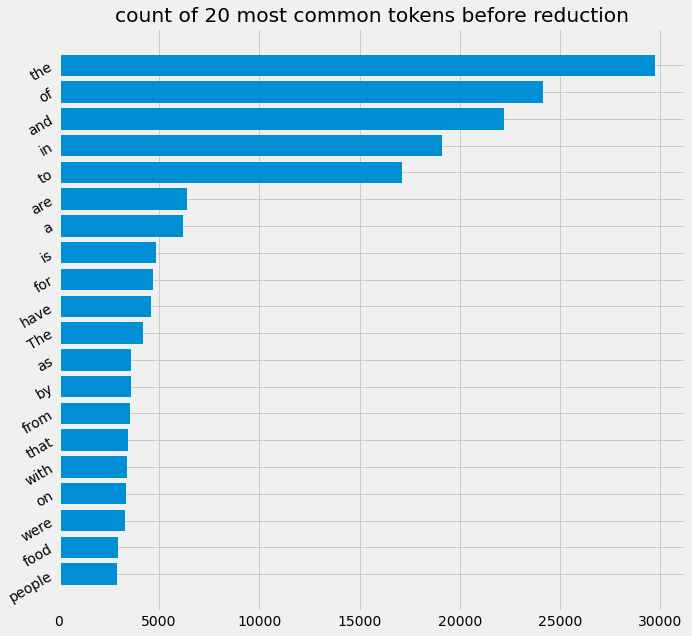

In [4]:
most_comm_tok = get_n_most_common_tokens(train_df, 20)
fig, ax = plt.subplots(1,1)
ax.barh([item[0] for item in reversed(most_comm_tok)], [item[1] for item in reversed(most_comm_tok)])
ax.set_title("count of 20 most common tokens before reduction")
ax.set_yticklabels([item[0] for item in reversed(most_comm_tok)], rotation=30, ha="right")
plt.show()

We remove punctuations, set all words to lowercase, remove numbers and finally apply the Portstemmer on the text corpus

In [5]:
if PREPROC:
    train_df = preprocess_txt(train_df)
    test_df = preprocess_txt(test_df)
    val_df = preprocess_txt(val_df)

    with open("train_df_preprocessed.pkl", "wb") as f:
        f.write(dill.dumps(train_df))
    with open("test_df_preprocessed.pkl", "wb") as f:
        f.write(dill.dumps(test_df))
    with open("val_df_preprocessed.pkl", "wb") as f:
        f.write(dill.dumps(val_df))
else:
    with open("train_df_preprocessed.pkl", "rb") as f:
            train_df = dill.loads(f.read())
    with open("test_df_preprocessed.pkl", "rb") as f:
            test_df = dill.loads(f.read())
    with open("val_df_preprocessed.pkl", "rb") as f:
            val_df = dill.loads(f.read())

<ipython-input-6-c2dd683e9b60>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([item[0] for item in reversed(most_comm_tok)], rotation=30, ha="right")


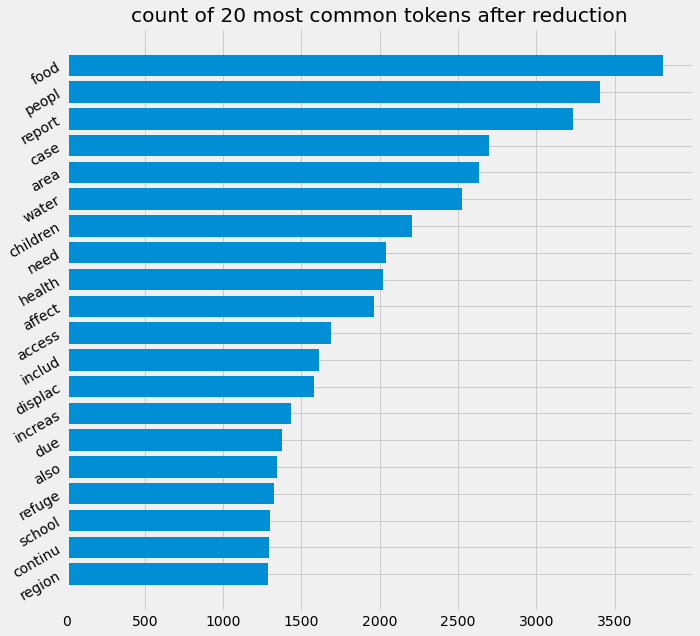

In [6]:
most_comm_tok = get_n_most_common_tokens(train_df, 20)
fig, ax = plt.subplots(1,1)
ax.barh([item[0] for item in reversed(most_comm_tok)], [item[1] for item in reversed(most_comm_tok)])
ax.set_title("count of 20 most common tokens after reduction")
ax.set_yticklabels([item[0] for item in reversed(most_comm_tok)], rotation=30, ha="right")
plt.show()

## Creating Dictionary

In [7]:
full_corpus_dictionary = create_corpus_dict(train_df["text"])

In [8]:
print("there are", len(full_corpus_dictionary), "different tokens in the text corpus")

there are 19780 different tokens in the text corpus


We visualize that the dictionary as it is contains few tokens with which occur very often and many tokens that occur only a few times

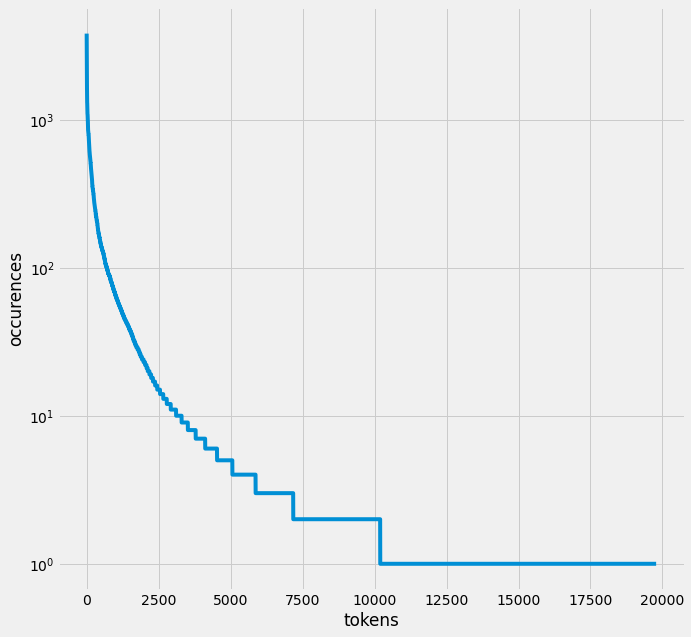

In [9]:
plot_token_dict(full_corpus_dictionary)

To reduce the size of the dictionary we use a cut off threshold to it and then remove all the tokens that are no longer in the dictionary from the text corpus

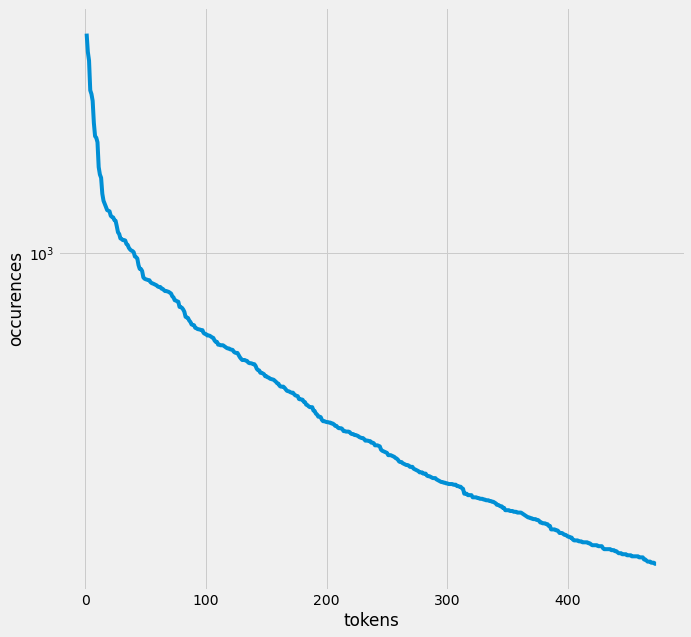

In [10]:
reduced_corpus_dictionary = create_corpus_dict(train_df["text"], \
                                            threshold=150)
plot_token_dict(reduced_corpus_dictionary)

Now we remove the words that were deleted from the dictionary from the text corpus

In [11]:
print("example from the training corpus before removing")
pprint(train_df.loc[100]["text"])

example from the training corpus before removing
('septemb humanitarian commun began negoti parti conflict obtain approv medic '
 'evacu assist plan would allow deliveri medicin citi evacu civilian develop '
 'full packag oper document medic')


In [12]:
if REDUCE_WORDS:
    
    threshold = 150
    train_df = clean_text_corpus(train_df, \
                                 full_corpus_dictionary, \
                                 threshold=threshold)
    test_df = clean_text_corpus(test_df, \
                                full_corpus_dictionary, \
                                threshold=threshold)
    val_df = clean_text_corpus(val_df, \
                               full_corpus_dictionary, \
                               threshold=threshold)

    with open("train_df_reduced.pkl", "wb") as f:
        f.write(dill.dumps(train_df))
    with open("test_df_reduced.pkl", "wb") as f:
        f.write(dill.dumps(test_df))
    with open("val_df_reduced.pkl", "wb") as f:
        f.write(dill.dumps(val_df))

else:
    with open("train_df_reduced.pkl", "rb") as f:
            train_df = dill.loads(f.read())
    with open("test_df_reduced.pkl", "rb") as f:
            test_df = dill.loads(f.read())
    with open("val_df_reduced.pkl", "rb") as f:
            val_df = dill.loads(f.read())

In [13]:
print("example from the training corpus after removing")
pprint(train_df.loc[100]["text"])

example from the training corpus after removing
('septemb humanitarian commun conflict medic evacu assist plan would medicin '
 'citi evacu civilian develop oper document medic')


## Sentence Vectors

To compute the sentence vectors we use token count and token frequency to get two pairs of high dimensional token-document matrices.

In [14]:
if VECTORIZE:
    train_df_tc, train_df_tf = vectorize_dataframe(train_df, \
                                                   reduced_corpus_dictionary)
    test_df_tc, test_df_tf = vectorize_dataframe(test_df, \
                                                 reduced_corpus_dictionary)
    val_df_tc, val_df_tf = vectorize_dataframe(val_df, \
                                               reduced_corpus_dictionary)

    with open("train_df_vectorize_tc.pkl", "wb") as f:
        f.write(dill.dumps(train_df_tc))
    with open("test_df_vectorize_tc.pkl", "wb") as f:
        f.write(dill.dumps(test_df_tc))
    with open("val_df_vectorize_tc.pkl", "wb") as f:
        f.write(dill.dumps(val_df_tc))
    with open("train_df_vectorize_tf.pkl", "wb") as f:
        f.write(dill.dumps(train_df_tf))
    with open("test_df_vectorize_tf.pkl", "wb") as f:
        f.write(dill.dumps(test_df_tf))
    with open("val_df_vectorize_tf.pkl", "wb") as f:
        f.write(dill.dumps(val_df_tf))
else:
    with open("train_df_vectorize_tc.pkl", "rb") as f:
        train_df_tc = dill.loads(f.read())
    with open("test_df_vectorize_tc.pkl", "rb") as f:
        test_df_tc = dill.loads(f.read())
    with open("val_df_vectorize_tc.pkl", "rb") as f:
        val_df_tc = dill.loads(f.read())
    with open("train_df_vectorize_tf.pkl", "rb") as f:
        train_df_tf = dill.loads(f.read())
    with open("test_df_vectorize_tf.pkl", "rb") as f:
        test_df_tf = dill.loads(f.read())
    with open("val_df_vectorize_tf.pkl", "rb") as f:
        val_df_tf = dill.loads(f.read())

In [15]:
print(f"sparsity of training vector: {compute_sparsity(train_df_tc, reduced_corpus_dictionary)}")
print(f"sparsity of testing vector: {compute_sparsity(test_df_tc, reduced_corpus_dictionary)}")
print(f"sparsity of validation vector: {compute_sparsity(val_df_tc, reduced_corpus_dictionary)}")

sparsity of training vector: 0.9577229940602033
sparsity of testing vector: 0.9577930467465351
sparsity of validation vector: 0.9577343199436222


## Dimensionality Reduction

To make life easier we create a dictionary for the necessary datasets.

In [16]:
#create training sets
dict_feature_sets = {
    'features': {
        'tc': dict(),
        'tf': dict(),
        'tc_svd': dict(),
        'tf_svd': dict()
    },
    'lables': dict()
}

dict_feature_sets['features']['tc']['train'] = get_vocab_tokens_from_df(train_df_tc, reduced_corpus_dictionary)
dict_feature_sets['features']['tc']['val'] = get_vocab_tokens_from_df(val_df_tc, reduced_corpus_dictionary)
dict_feature_sets['features']['tc']['test'] = get_vocab_tokens_from_df(test_df_tc, reduced_corpus_dictionary)

dict_feature_sets['features']['tf']['train'] = get_vocab_tokens_from_df(train_df_tf, reduced_corpus_dictionary)
dict_feature_sets['features']['tf']['val'] = get_vocab_tokens_from_df(val_df_tf, reduced_corpus_dictionary)
dict_feature_sets['features']['tf']['test'] = get_vocab_tokens_from_df(test_df_tf, reduced_corpus_dictionary)

dict_feature_sets['lables']['train'] = train_df['label']
dict_feature_sets['lables']['val'] = val_df['label']
dict_feature_sets['lables']['test'] = test_df['label']

Now we use latent semantic analysis as described in the lecture to get low dimensional token-document matrices from the tc and tf matrices

In [17]:
test_lsa = latent_semantic_analysis(dict_feature_sets['features']['tc'], \
                                    reduced_corpus_dictionary, \
                                    k=50)

In [18]:
# just here to check the dimensions
print(test_lsa[0].shape)
print(test_lsa[1].shape)
print(test_lsa[2].shape)

(8400, 50)
(1800, 50)
(1800, 50)


Now that we know that the LSA works, we get the optimal k to find the smallest number of components that contain the most indformation about the original dataset

In [19]:
if DIM_REDUCT:
    dict_feature_sets['features']['tc_svd']['train'], \
    dict_feature_sets['features']['tc_svd']['val'], \
    dict_feature_sets['features']['tc_svd']['test'] = \
    get_best_lsa_reduced_feature_set(dict_feature_sets['features']['tc'], \
                                     reduced_corpus_dictionary)
    dict_feature_sets['features']['tf_svd']['train'], \
    dict_feature_sets['features']['tf_svd']['val'], \
    dict_feature_sets['features']['tf_svd']['test'] = \
    get_best_lsa_reduced_feature_set(dict_feature_sets['features']['tf'], \
                                     reduced_corpus_dictionary)

    with open("train_df_vectorize_tc_lsa.pkl", "wb") as f:
        f.write(dill.dumps(dict_feature_sets['features']['tc_svd']['train']))
    with open("test_df_vectorize_tc_lsa.pkl", "wb") as f:
        f.write(dill.dumps(dict_feature_sets['features']['tc_svd']['test']))
    with open("val_df_vectorize_tc_lsa.pkl", "wb") as f:
        f.write(dill.dumps(dict_feature_sets['features']['tc_svd']['val']))
    with open("train_df_vectorize_tf_lsa.pkl", "wb") as f:
        f.write(dill.dumps(dict_feature_sets['features']['tf_svd']['train']))
    with open("test_df_vectorize_tf_lsa.pkl", "wb") as f:
        f.write(dill.dumps(dict_feature_sets['features']['tf_svd']['test']))
    with open("val_df_vectorize_tf_lsa.pkl", "wb") as f:
        f.write(dill.dumps(dict_feature_sets['features']['tf_svd']['val']))
else:
    with open("train_df_vectorize_tc_lsa.pkl", "rb") as f:
        dict_feature_sets['features']['tc_svd']['train'] = dill.loads(f.read())
    with open("test_df_vectorize_tc_lsa.pkl", "rb") as f:
        dict_feature_sets['features']['tc_svd']['test'] = dill.loads(f.read())
    with open("val_df_vectorize_tc_lsa.pkl", "rb") as f:
        dict_feature_sets['features']['tc_svd']['val'] = dill.loads(f.read())
    with open("train_df_vectorize_tf_lsa.pkl", "rb") as f:
        dict_feature_sets['features']['tf_svd']['train'] = dill.loads(f.read())
    with open("test_df_vectorize_tf_lsa.pkl", "rb") as f:
        dict_feature_sets['features']['tf_svd']['test'] = dill.loads(f.read())
    with open("val_df_vectorize_tf_lsa.pkl", "rb") as f:
        dict_feature_sets['features']['tf_svd']['val'] = dill.loads(f.read())

In [20]:
print("SVD of the TC Dataset")
print(dict_feature_sets['features']['tc_svd']['train'].shape)
print(dict_feature_sets['features']['tc_svd']['val'].shape)
print(dict_feature_sets['features']['tc_svd']['test'].shape)

print("SVD of the TF Dataset")
print(dict_feature_sets['features']['tf_svd']['train'].shape)
print(dict_feature_sets['features']['tf_svd']['val'].shape)
print(dict_feature_sets['features']['tf_svd']['test'].shape)

SVD of the TC Dataset
(8400, 63)
(1800, 63)
(1800, 63)
SVD of the TF Dataset
(8400, 69)
(1800, 69)
(1800, 69)


<a name="section-training"></a><h2 style="color:rgb(0,120,170)">Task B: Training and Results Analysis (15 points)</h2>

<div>

To evaluate the models, use <ins>accuracy</ins> as the metric throughout the task. 

**Dummy baseline (2 points).** Create one dummy baseline classifier that predicts the validation/test labels only based on the distribution of the labels in the training set (without any use of the feature vectors). This is a weak baseline and acts as a sanity check for the actual classifiers.

**Training and tuning classifiers (5 points).** Select at least <ins>two classification algorithms</ins> from standard machine learning classifiers. Using each classification algorithm, train a machine learning model on each of the variations of feature vectors. This should result in <ins>eight experiment sets</ins> (4 variations of feature vectors × 2 classification algorithms). The ML model in each of the experiments possibly have several involving hyper-parameters (also keep in mind the dimensionality size $k$ in the low-dimensional vectors as yet another hyper-parameter). For each experiment, select <ins>one of the hyper-parameters and tune its value</ins>. The tuning process is done by first assigning at least <ins>five different values</ins> to the hyper-parameter, then training separate models based on each value, and finally using the evaluation results on the validation set to select the best-performing model. Report the studied hyper-parameters, the evaluation results of each on validation set, and finally the selected value of the hyper-parameter. 

**Evaluation and plots (3 point).** Evaluate the selected model of the eight experiment on the test set and report the results of the experiments on <ins>both validation and test sets (side by side) in one table as well as in one plot</ins>. Compare different models. Are the test results lower(/higher) than the validation results? If it is the case, where can it be rooted from? Among all these models and variations, what are the most important factors improving the classification results?

**Confusion matrix (2 point).** Select the best performing model among the experiments and use it to create a confusion matrix. The matrix shows the predicted versus true results per each label. Explain your observations on the matrix. Across which classes do you observe significant confusions?

**Features visualization (3 point).** Continue with the best performing model and now take its feature vectors for the *dataitems in the test set*. Project these feature vectors to a 2-dimensional space using the TSNE method.  Using these 2-dimensional vectors, create two plots where the dataitems are shown as points (small circles) on the plots. The plots look exactly the same but only differ in the coloring of the data points. The first plot colors every dataitem with its *true label*, while the second one colors each according to its *predicted label by the model*. Keep in mind to assign the same colors to the classes of the plots, so that the plots are visually comparable. Put these two plots side by side, observe the differences, and compare the results. Report your observations.

</div>

## Dummy Baseline

In [21]:
def get_dummy_baseline(baseline: pd.Series):
    """
    Creates a function acts as a baseline for our task. The given series provides a base for the calculation.
    The resulting function returns a randomly drawn label of those appearing in the baseline series with
    the probability of the label distribution of the baseline series.
    :param baseline:
    :return: function that draws randomly lables from the given baseline
    """
    def inner():
        return np.random.choice(len(probs), 1, p=probs)

    frequencies = baseline.value_counts(normalize=True)
    frequencies = frequencies.sort_index()
    probs = frequencies.to_numpy()

    return inner

In [22]:
dummy_baseline = get_dummy_baseline(dict_feature_sets['lables']['train'])
dummy_baseline()

array([5])

Baseline has a accuracy of 0.1250


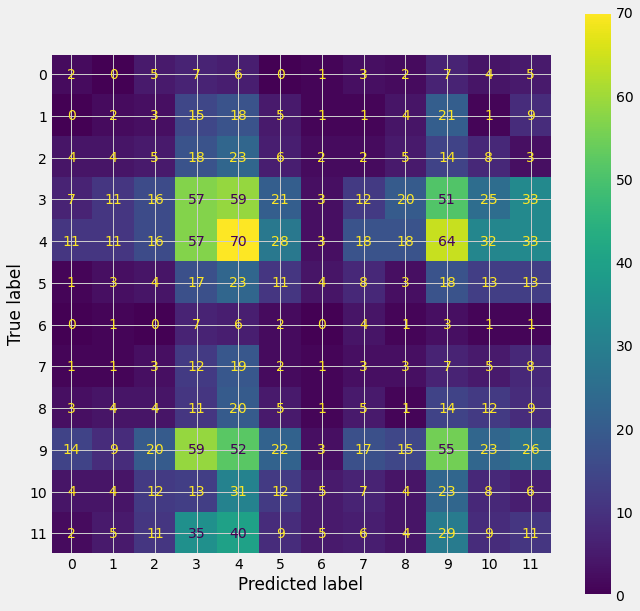

In [23]:
dummy_baseline_confusion, baseline_acc = \
calc_baseline_confusion(dict_feature_sets['lables']['test'],
                        get_dummy_baseline(baseline=dict_feature_sets['lables']['train']))

print(f"Baseline has a accuracy of {baseline_acc:.4f}")
conf_base = ConfusionMatrixDisplay(confusion_matrix=dummy_baseline_confusion)
conf_base.plot()
plt.show()

## Training and tuning classifiers

For the comparison task we choose as ML-Models the KNearestNeighbors and the RandomForest Classifier.
The following parameters and corresponding values were chosen and compared.<br />
<ul>
    <li>KNN:</li>
    <ul>
        <li>n_neighbors: 40-60</li>
    </ul>
    <li>RandomForest:</li>
    <ul>
        <li>n_estimators: {1, 101, 201, 301, 401, 501},</li>
        <li>max_depth: 1-15,</li>
        <li>max_features: {'auto', 'sqrt', 'log2'},</li>
        <li>max_leaf_nodes: {2, 4, 6, 8, 10},</li>
        <li>criterion: {'gini', 'entropy'}</li>
    </ul>
</ul>
Each of the 50+ possible model variations was trained and tested against the 4 feature sets.
<ul>
    <li>tc: Counts of each token in the document</li>
    <li>tf: log(count +1) of the tokens</li>
    <li>tc_svd: SVD performed on the 'tc' dataset with a reduction to the most informative components</li>
    <li>tf_svd: SVD performed on the 'tf' dataset with a reduction to the most informative components</li>
</ul>


In [24]:
dict_parameter_sets = {
        'knn': {
            'modelclass': KNeighborsClassifier(),
            'parameters': {
                'n_neighbors': range(40, 55)
            }
        },
        'randomForest': {
            'modelclass': RandomForestClassifier(),
            'parameters': {
                'n_estimators': range(1, 510, 100),
                'max_depth': range(1, 15),
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_leaf_nodes': range(2, 11, 2),
                'criterion': ['gini', 'entropy']
            }
        }
    }

In [25]:
if COMPARE_MODELS:
    model_comparison = get_best_model_featureset(datasets=dict_feature_sets, classifier=dict_parameter_sets)
    with open("model_comparison.pkl", "wb") as f:
        f.write(dill.dumps(model_comparison))
else:
    with open("model_comparison.pkl", "rb") as f:
        model_comparison = dill.loads(f.read())

In [26]:
best_predictions = model_comparison['best_values']
print(f"The best combination over all 200+ model-dataset combinations was the {best_predictions['model']} model "
      f"on the {best_predictions['features']} feature set, where the {best_predictions['parameter']} was set "
      f"to '{best_predictions['parameter_value']}' and the accuracy gained a value of "
      f"'{best_predictions['accuracy_val']}' on the validation set.")

The best combination over all 200+ model-dataset combinations was the randomForest model on the tc feature set, where the n_estimators was set to '201' and the accuracy gained a value of '0.605' on the validation set.


## Evaluation and plots

To get a better grasp over the best best models for each featureset, modelclass and hyperparameter we printed a table with the best values and the corresponding accuracy scores of validation and test set.

In [27]:
statistics = get_model_statistics(model_comparison)
print(statistics)

   feature set    modelclass       parameter best value  accuracy validation  \
0           tc           knn     n_neighbors         46             0.495000   
1           tc  randomForest    n_estimators        201             0.605000   
2           tc  randomForest       max_depth         14             0.562222   
3           tc  randomForest    max_features       auto             0.562222   
4           tc  randomForest  max_leaf_nodes         10             0.465000   
5           tc  randomForest       criterion    entropy             0.474444   
6           tf           knn     n_neighbors         40             0.499444   
7           tf  randomForest    n_estimators        501             0.605000   
8           tf  randomForest       max_depth         14             0.567778   
9           tf  randomForest    max_features       auto             0.566667   
10          tf  randomForest  max_leaf_nodes         10             0.472222   
11          tf  randomForest       crite

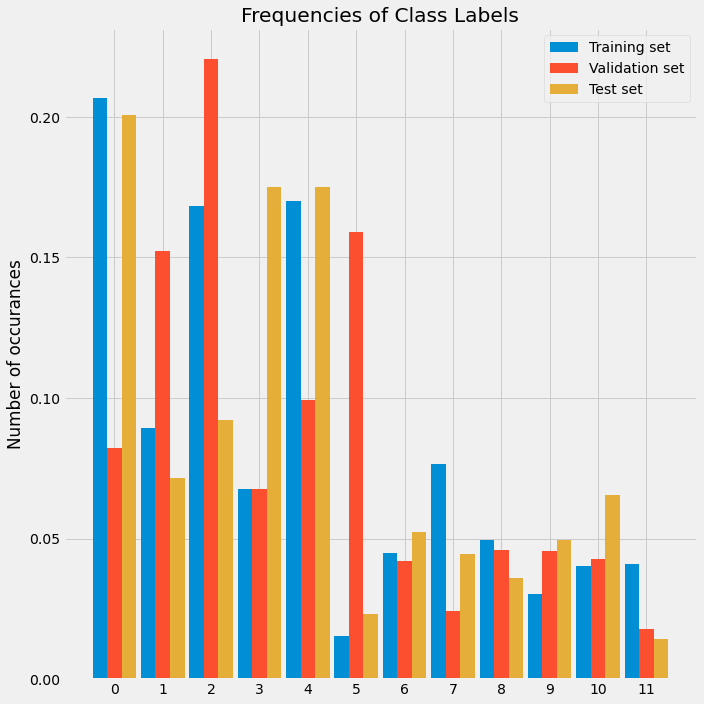

In [28]:
train_freq = FreqDist(dict_feature_sets['lables']['train'])
val_freq = FreqDist(dict_feature_sets['lables']['val'])
test_freq = FreqDist(dict_feature_sets['lables']['test'])

x = np.arange(len(train_freq))  # the label locations
width = 0.3# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, np.array(list(train_freq.values()))/len(dict_feature_sets['lables']['train']), 
                width, label='Training set')
rects2 = ax.bar(x, np.array(list(val_freq.values()))/len(dict_feature_sets['lables']['val']), 
                width, label='Validation set')
rects2 = ax.bar(x + width, np.array(list(test_freq.values()))/len(dict_feature_sets['lables']['test']), 
                width, label='Test set')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of occurances')
ax.set_title('Frequencies of Class Labels')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()

Are the test results lower(/higher) than the validation results? <br />
    - Test results are slightly better than the validation results.

If it is the case, where can it be rooted from? <br />
    - Could be caused, because the test set has some better matches the train distribution lables. For example class 4       has more examples in training and test set than the validation set.

Among all these models and variations, what are the most important factors improving the classification results?<br />
    - KNN models work better on LSA datasets.
    - Random forests work better on the sparse datasets

## Confusion matrix

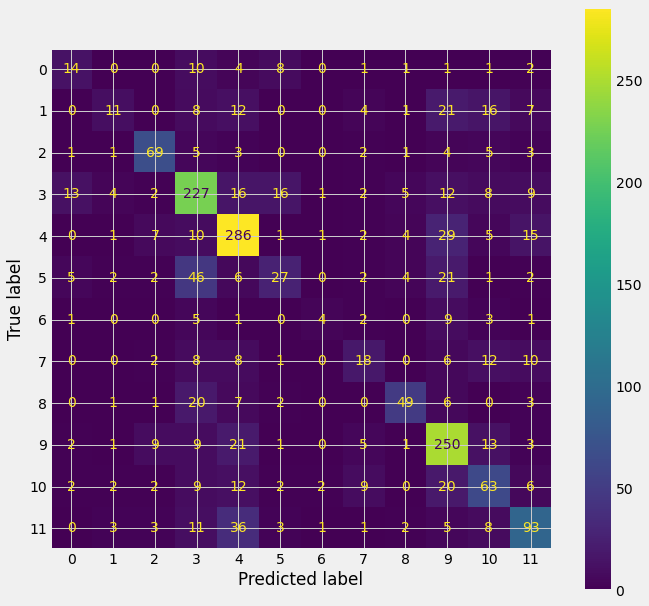

In [29]:
disp = ConfusionMatrixDisplay(confusion_matrix=best_predictions['confusion_matrix_test'])
disp.plot()
plt.show()

The diagonal shows the correct classified values. The following things can be observed:
<ul>
    <li>Class 5 object are generally misclassified as Class 3 or 9 and tend not to be correct classified as the correct classification lies at 27 objects</li>
    <li>Class 1 objects are rather missclassified than correct.</li>
    <li>Class 7 objects are also rather missclassified than correct.</li>
    <li>Class 11 objects are generally misclassified as Class 4.</li>
</ul>

## Features visualization

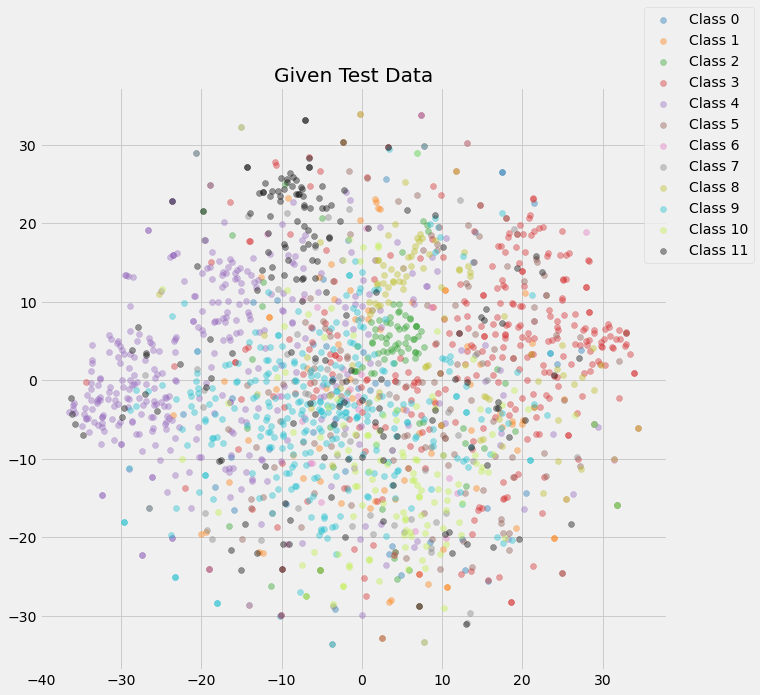

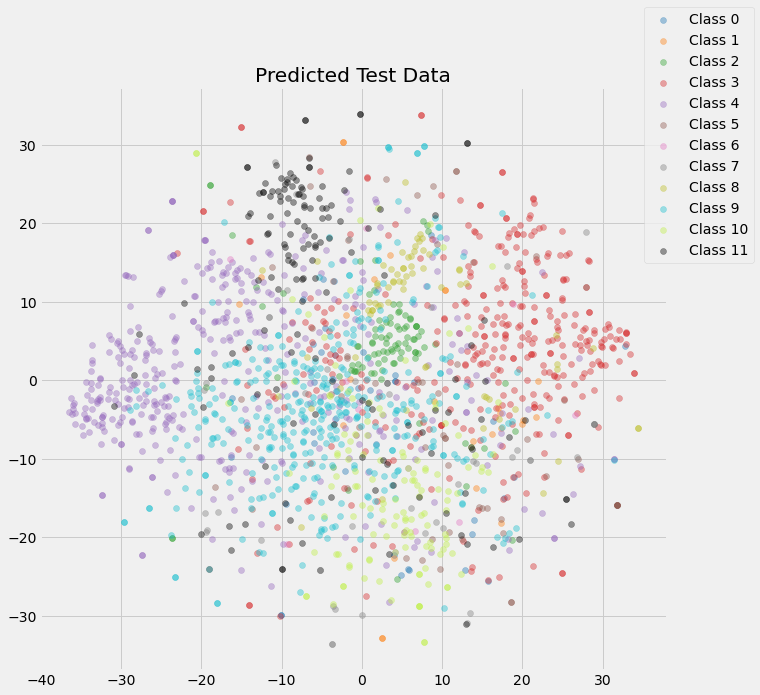

In [30]:
plot_features(dict_feature_sets, best_predictions)

<a name="section-optional"></a><h2 style="color:rgb(0,120,170)">Task C: Linear Model Interpretability (2 extra point)</h2>

<div>
Train a logistic regression model on the high-dimensional vectors. Take the coefficient weights, learned by the model, on each dimension (which here corresponds to each token in the dictionary). Separately for each class, study what are the tokens that have the highest contributions/importance for the predictions of the model.
</div>